# Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods

In [496]:
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable
from typing import Any
from functools import partial
import scipy.optimize as opt
from math import sqrt, fabs, sin
import pandas as pd
import random

In [497]:
def plot(fn, x: tuple[float, float], argmin):
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    
    x = np.linspace(x[0], x[1], 1000)
    y = fn(x)
    
    ax.plot(x, y, zorder=1)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    
    ax.scatter(argmin, fn(argmin), color='red', zorder=2)

In [630]:
def exhaustive_search(fn: Callable, x: tuple[float, float], epsilon: float):
    minimum = fn(x[0])
    argmin = x[0]
    iters = 0
    f_calculations = 1
    
    # x[1] + epsilon to include end point of the x interval
    for x_i in np.arange(x[0], x[1] + epsilon, epsilon):
        val = fn(x_i)
        if val < minimum:
            minimum = val
            argmin = x_i
        
        iters += 1
        f_calculations += 1
    
    return argmin, iters, f_calculations

def dichotomy_search(fn: Callable, x: tuple[float, float], epsilon: float):
    delta = epsilon / 2
    lower = x[0]
    higher = x[1]
    iters = 0
    f_calculations = 0
    
    while higher - lower >= epsilon:
        x_lower = (lower + higher - delta) / 2
        x_higher = (lower + higher + delta) / 2
        
        if fn(x_lower) <= fn(x_higher):
            higher = x_higher
        else:
            lower = x_lower
        
        iters += 1
        f_calculations += 2
    
    argmin = np.around((lower + higher) / 2, decimals=3)
    
    return argmin, iters, f_calculations

def golden_section_search(fn: Callable, x: tuple[float, float], epsilon: float):    
    l, r = x
    
    phi = (1 + sqrt(5)) / 2
    resphi = 2 - phi
    x1 = l + resphi * (r - l)
    x2 = r - resphi * (r - l)
    f1 = fn(x1)
    f2 = fn(x2)
    
    iters = 0
    f_calculations = 2
    
    while True:
        if f1 < f2:
            r = x2
            x2 = x1
            f2 = f1
            x1 = l + resphi * (r - l)
            f1 = fn(x1)
        else:
            l = x1
            x1 = x2
            f1 = f2
            x2 = r - resphi * (r - l)
            f2 = fn(x2)
        
        iters += 1
        f_calculations += 1
        
        if abs(r - l) < epsilon:
            break
            
    return (x1 + x2) / 2, iters, f_calculations

**I.** Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision $\epsilon = 0.001$) solution $x: f(x) → \min$ for the following functions and domains:

1) $f(x) = x^3, x \in [0; 1]$

In [499]:
def cubic(x: float) -> float:
    return x ** 3

In [634]:
exhaustive_min, exhaustive_iters, exhaustive_f_calculations = exhaustive_search(cubic, (0, 1), 0.0001)

exhaustive_min, exhaustive_iters, exhaustive_f_calculations

(0, 10001, 10002)

In [635]:
dichotomy_min, dichotomy_iters, dichotomy_f_calculations = dichotomy_search(cubic, (0, 1), 0.0001)

dichotomy_min, dichotomy_iters, dichotomy_f_calculations

(0.0, 15, 30)

In [636]:
golden_min, golden_iters, golden_f_calculations = golden_section_search(cubic, (0, 1), 0.0001)

golden_min, golden_iters, golden_f_calculations

(3.3053480675947935e-05, 20, 22)

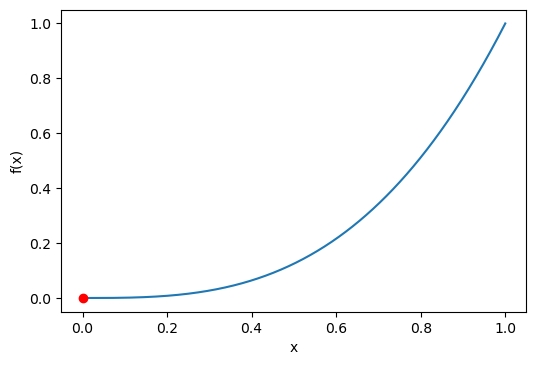

In [637]:
plot(cubic, (0, 1), exhaustive_min)

In [638]:
pd.DataFrame(
    [
        ['Exhaustive search', exhaustive_min, cubic(exhaustive_min), exhaustive_iters, exhaustive_f_calculations],
        ['Dichotomy search', dichotomy_min, cubic(dichotomy_min), dichotomy_iters, dichotomy_f_calculations],
        ['Golden section search', golden_min, cubic(golden_min), golden_iters, golden_f_calculations]
    ],
    columns=['Method', '$x_{min}$', '$f(x_{min})$', 'Iterations', 'F-calculations']
)

,Method,$x_{min}$,$f(x_{min})$,Iterations,F-calculations
0,Exhaustive search,0.000000,0.000000e+00,10001,10002
1,Dichotomy search,0.000000,0.000000e+00,15,30
2,Golden section search,0.000033,3.611200e-14,20,22


2) $f(x) = |x - 0.2|, x \in [0, 1]$

In [639]:
def absolute(x: float) -> float:
    return abs(x - 0.2)

In [640]:
exhaustive_min, exhaustive_iters, exhaustive_f_calculations = exhaustive_search(absolute, (0, 1), 0.0001)

exhaustive_min, exhaustive_iters, exhaustive_f_calculations

(0.2, 10001, 10002)

In [645]:
dichotomy_min, dichotomy_iters, dichotomy_f_calculations = dichotomy_search(absolute, (0, 1), 0.0001)

dichotomy_min, dichotomy_iters, dichotomy_f_calculations

(0.2, 15, 30)

In [642]:
golden_min, golden_iters, golden_f_calculations = golden_section_search(absolute, (0, 1), 0.0001)

golden_min, golden_iters, golden_f_calculations

(0.2000198320884055, 20, 22)

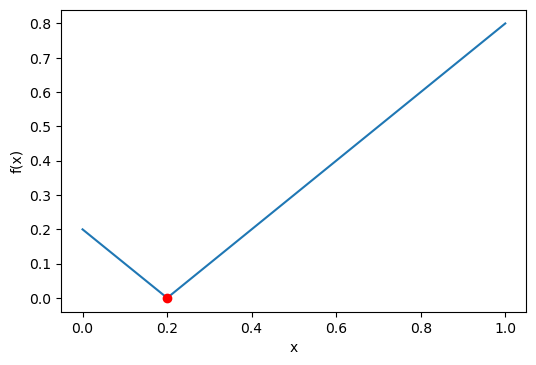

In [643]:
plot(absolute, (0, 1), exhaustive_min)

In [644]:
pd.DataFrame(
    [
        ['Exhaustive search', exhaustive_min, cubic(exhaustive_min), exhaustive_iters, exhaustive_f_calculations],
        ['Dichotomy search', dichotomy_min, cubic(dichotomy_min), dichotomy_iters, dichotomy_f_calculations],
        ['Golden section search', golden_min, cubic(golden_min), golden_iters, golden_f_calculations]
    ],
    columns=['Method', '$x_{min}$', '$f(x_{min})$', 'Iterations', 'F-calculations']
)

,Method,$x_{min}$,$f(x_{min})$,Iterations,F-calculations
0,Exhaustive search,0.20000,0.008000,10001,10002
1,Dichotomy search,0.20000,0.008000,15,30
2,Golden section search,0.20002,0.008002,20,22


3) $f(x) = x\sin{\frac{1}{x}}, x \in [0.01, 1]$

In [511]:
def sine(x):
    return x * np.sin(1 / x)

In [647]:
exhaustive_min, exhaustive_iters, exhaustive_f_calculations = exhaustive_search(sine, (0.01, 1), 0.0001)

exhaustive_min, exhaustive_iters, exhaustive_f_calculations

(0.22249999999999873, 9901, 9902)

In [648]:
dichotomy_min, dichotomy_iters, dichotomy_f_calculations = dichotomy_search(sine, (0.01, 1), 0.0001)

dichotomy_min, dichotomy_iters, dichotomy_f_calculations

(0.223, 15, 30)

In [649]:
golden_min, golden_iters, golden_f_calculations = golden_section_search(sine, (0.01, 1), 0.0001)

golden_min, golden_iters, golden_f_calculations

(0.22253575499749811, 20, 22)

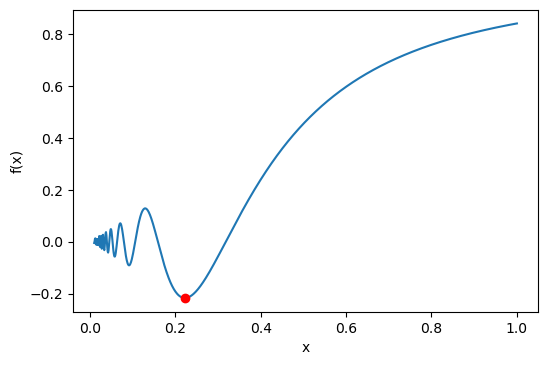

In [650]:
plot(sine, (0.01, 1), exhaustive_min)

In [651]:
pd.DataFrame(
    [
        ['Exhaustive search', exhaustive_min, cubic(exhaustive_min), exhaustive_iters, exhaustive_f_calculations],
        ['Dichotomy search', dichotomy_min, cubic(dichotomy_min), dichotomy_iters, dichotomy_f_calculations],
        ['Golden section search', golden_min, cubic(golden_min), golden_iters, golden_f_calculations]
    ],
    columns=['Method', '$x_{min}$', '$f(x_{min})$', 'Iterations', 'F-calculations']
)

,Method,$x_{min}$,$f(x_{min})$,Iterations,F-calculations
0,Exhaustive search,0.222500,0.011015,9901,9902
1,Dichotomy search,0.223000,0.011090,15,30
2,Golden section search,0.222536,0.011020,20,22


**II.** Generate random numbers $\alpha \in (0, 1)$ and $\beta \in (0, 1)$

In [517]:
alpha = random.uniform(0, 1)
beta = random.uniform(0, 1)

alpha, beta

(0.8426585759717724, 0.020279213814659358)

Furthermore, generate the noisy data $\{x_k, y_k\}$, where $k = 0, … ,100$, according to the following rule:

$y_k = \alpha x_k + \beta + \delta_k, x_k = \frac{k}{100}$

where $\delta_k \sim N(0,1)$ are values of a random variable with standard normal
distribution.

In [518]:
k = 101
y = [alpha * (x / k) + beta + np.random.normal(0, 1) for x in range(101)]

def plot_scatter(x: list[float], y: list[float]) -> None:
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    
    ax.scatter(x, y, zorder=1)

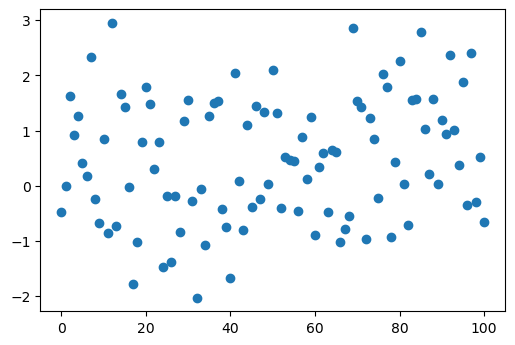

In [519]:
plot_scatter(range(k), y)

In [616]:
import json

# Write points to file for the next task
dumped = json.dumps({'alpha': alpha, 'beta': beta, 'y': y})
file = open('./points.json', 'w')
file.write(dumped)

2142

Approximate the data by the following linear and rational functions:
1. $f(x, a, b) = ax + b$ (linear approximant)
2. $f(x, a, b) = \frac{a}{1 + bx}$ (rational approximant)

In [595]:
def linear(x: float, a: float, b: float) -> float:
    return a * x + b

def rational(x: float, a: float, b: float) -> float:
    return a / (1 + b * x)

by means of least squares through the numerical minimization (with precision $\epsilon = 0.001$) of the following function:

$D(a, b) = \sum_{k=0}^{100} (F(x_k, a, b) - y_k)^2$

In [596]:
def least_squares(fn: Callable, truth: list[float], a: float, b: float, k: int):
    return sum([(fn(x / k, a, b) - truth[x]) ** 2 for x in range(k)])

To solve the minimization problem, use the methods of exhaustive search, Gauss and Nelder-Mead

In [672]:
from scipy.optimize import minimize

def exhaustive_search_grid(fn: Callable, a_range: tuple[float, float], b_range: tuple[float, float], epsilon: float):
    minimum = fn(a_range[0], b_range[0])
    a_min = a_range[0]
    b_min = b_range[0]
    iters = 0
    f_calculations = 1
    
    # x[1] + epsilon to include end point of the x interval
    for a_i in np.arange(a_range[0], a_range[1] + epsilon, epsilon):
        for b_i in np.arange(b_range[0], b_range[1] + epsilon, epsilon):    
            val = fn(a=a_i, b=b_i)
            if val < minimum:
                minimum = val
                a_min = a_i
                b_min = b_i

            iters += 1
            f_calculations += 1
    
    return (a_min, b_min), iters, f_calculations

def gauss(fn: Callable, a_range: tuple[float, float], b_range: tuple[float, float], initial: tuple[float, float], epsilon: float):
    #return minimize(lambda x: fn(*x), initial, bounds=[a_range, b_range], method='CG')

    a, b = initial
    a_old, b_old = a, b
    iters = 0
    f_calculations = 0

    while (fabs(a_old - a) + fabs(b_old - b)) / 2 > epsilon or iters == 0:
        a_old, b_old = a, b
        b, _, f_calculations_1 = golden_section_search(lambda x: fn(a, x), b_range, epsilon)
        a, _, f_calculations_2 = golden_section_search(lambda x: fn(x, b), a_range, epsilon)
        
        iters += 1
        f_calculations += f_calculations_1
        f_calculations += f_calculations_2

    return a, b, iters, f_calculations

def nelder_mead(fn, initial):
    return minimize(lambda x: fn(*x), initial, method="Nelder-Mead")

In [674]:
linear_optimization = lambda a, b: least_squares(linear, y, a, b, k)

In [675]:
(exhaustive_a_min, exhaustive_b_min), exhaustive_iters, exhaustive_f_calc = exhaustive_search_grid(
    linear_optimization, (0, 1), (0, 1), 0.001)

In [676]:
gauss_a_min, gauss_b_min, gauss_iters, gauss_f_calculations = gauss(linear_optimization, (0, 1), (0, 1), (0, 0), 0.001)

gauss_a_min, gauss_b_min, gauss_iters, gauss_f_calculations

(0.6207730400471081, 0.17568145747623568, 18, 612)

In [677]:
nelder_mead_result = nelder_mead(linear_optimization, (0, 0))
nelder_mead_a_min, nelder_mead_b_min = nelder_mead_result.x

nelder_mead_result

 final_simplex: (array([[0.6244017 , 0.17316694],
       [0.62432348, 0.17321351],
       [0.62443181, 0.17319895]]), array([124.02109483, 124.02109487, 124.02109493]))
           fun: 124.02109483314892
       message: 'Optimization terminated successfully.'
          nfev: 129
           nit: 68
        status: 0
       success: True
             x: array([0.6244017 , 0.17316694])

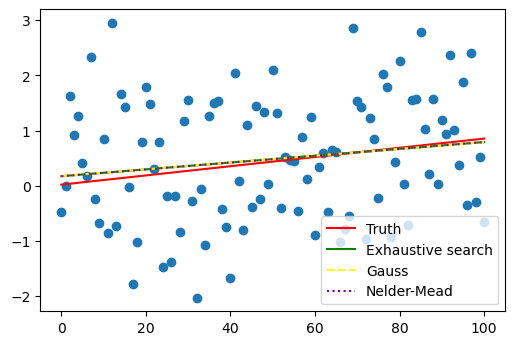

In [678]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
    
ax.scatter(range(k), y, zorder=1)
ax.plot(range(k), [linear(x / k, alpha, beta) for x in range(k)], color='red', label="Truth")
ax.plot(range(k), [linear(x / k, exhaustive_a_min, exhaustive_b_min) for x in range(k)], color='green', label='Exhaustive search')
ax.plot(range(k), [linear(x / k, gauss_a_min, gauss_b_min) for x in range(k)], color='yellow', linestyle='dashed', label='Gauss')
ax.plot(range(k), [linear(x / k, nelder_mead_a_min, nelder_mead_b_min) for x in range(k)], color='purple', linestyle='dotted', label='Nelder-Mead')
ax.legend()

In [679]:
pd.DataFrame(
    [
        ['Exhaustive search', exhaustive_a_min, exhaustive_b_min, exhaustive_iters, exhaustive_f_calc],
        ['Gauss method', gauss_a_min, gauss_b_min, gauss_iters, gauss_f_calculations],
        ['Nelder-Mead method', nelder_mead_a_min, nelder_mead_b_min, nelder_mead_result.nit, nelder_mead_result.nfev]
    ],
    columns=['Method', '$a_{min}$', '$b_{min}$', 'Iterations', 'F-Calculations']
)

,Method,$a_{min}$,$b_{min}$,Iterations,F-Calculations
0,Exhaustive search,0.625000,0.173000,1002001,1002002
1,Gauss method,0.620773,0.175681,18,612
2,Nelder-Mead method,0.624402,0.173167,68,129


In [680]:
rational_optimization = lambda a, b: least_squares(rational, y, a, b, k)

In [681]:
(exhaustive_a_min, exhaustive_b_min), exhaustive_iters, exhaustive_f_calc = exhaustive_search_grid(
    rational_optimization, (0, 1), (0, 1), 0.001)

In [683]:
gauss_a_min, gauss_b_min, gauss_iters, gauss_f_calculations = gauss(rational_optimization, (0, 1), (0, 1), (0, 0), 0.001)

gauss_a_min, gauss_b_min, gauss_iters, gauss_f_calculations

(0.4822724876167185, 0.000366568717928702, 4, 136)

In [684]:
nelder_mead_result = nelder_mead(rational_optimization, (0, 0))
nelder_mead_a_min, nelder_mead_b_min = nelder_mead_result.x

nelder_mead_result

 final_simplex: (array([[ 0.27790851, -0.72036088],
       [ 0.27788773, -0.72035196],
       [ 0.27795522, -0.72028694]]), array([123.35306497, 123.35306503, 123.35306516]))
           fun: 123.35306497121627
       message: 'Optimization terminated successfully.'
          nfev: 117
           nit: 60
        status: 0
       success: True
             x: array([ 0.27790851, -0.72036088])

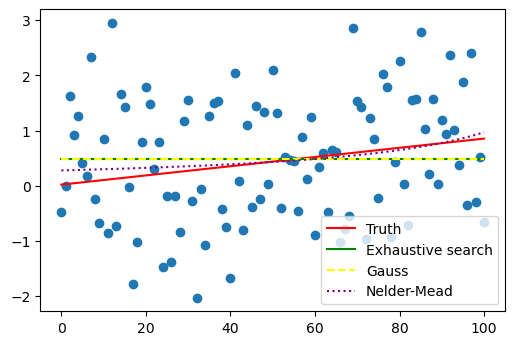

In [685]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
    
ax.scatter(range(k), y, zorder=1)
ax.plot(range(k), [linear(x / k, alpha, beta) for x in range(k)], color='red', label="Truth")
ax.plot(range(k), [rational(x / k, exhaustive_a_min, exhaustive_b_min) for x in range(k)], color='green', label='Exhaustive search')
ax.plot(range(k), [rational(x / k, gauss_a_min, gauss_b_min) for x in range(k)], color='yellow', linestyle='dashed', label='Gauss')
ax.plot(range(k), [rational(x / k, nelder_mead_a_min, nelder_mead_b_min) for x in range(k)], color='purple', linestyle='dotted', label='Nelder-Mead')
ax.legend()

In [686]:
pd.DataFrame(
    [
        ['Exhaustive search', exhaustive_a_min, exhaustive_b_min, exhaustive_iters, exhaustive_f_calc],
        ['Gauss method', gauss_a_min, gauss_b_min, gauss_iters, gauss_f_calculations],
        ['Nelder-Mead method', nelder_mead_a_min, nelder_mead_b_min, nelder_mead_result.nit, nelder_mead_result.nfev]
    ],
    columns=['Method', '$a_{min}$', '$b_{min}$', 'Iterations', 'F-Calculations']
)

,Method,$a_{min}$,$b_{min}$,Iterations,F-Calculations
0,Exhaustive search,0.482000,0.000000,1002001,1002002
1,Gauss method,0.482272,0.000367,4,136
2,Nelder-Mead method,0.277909,-0.720361,60,117
